In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as` np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/stores_1_to_35.csv")

In [107]:
df
dfa=df.copy()
df.drop(df[df.Type =='C'].index, inplace=True)

In [108]:
dfa.drop(dfa[dfa.Store >10].index, inplace=True)

In [109]:
dfa

,Unnamed: 0,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Weekly_Sales
0,0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315,1643690.90
1,1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315,1641957.44
2,2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315,1611968.17
3,5,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,A,151315,1439541.59
4,6,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,A,151315,1472515.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1770,10,8/17/2012,False,88.83,4.002,4407.90,0.00,7.20,3037.56,130.790968,7.170,B,126512,1827797.40
385,1773,10,9/7/2012,True,83.07,4.124,11848.88,20.00,47.52,3530.47,130.932548,7.170,B,126512,1708283.28
386,1775,10,9/21/2012,False,81.93,4.125,11273.56,245.91,27.00,2976.50,131.010333,7.170,B,126512,1671857.57
387,1776,10,9/28/2012,False,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170,B,126512,1694862.41


<Figure size 864x288 with 0 Axes>

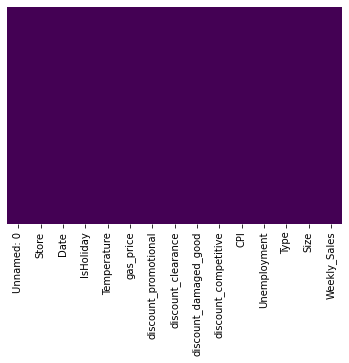

<Figure size 864x288 with 0 Axes>

In [110]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.figure(figsize=(12,4))

In [111]:
dfa.describe()

,Unnamed: 0,Store,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Size,Weekly_Sales
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02
mean,809.208226,4.861183,63.521440,3.492257,7293.894139,3188.332956,1572.275501,3095.370206,203.615421,6.507838,139937.177378,1.329770e+06
std,554.931156,2.990752,17.394233,0.254833,8055.708978,10551.425971,10988.478784,5524.827030,35.679061,1.126070,58557.107283,6.739780e+05
min,0.000000,1.000000,7.460000,3.031000,35.940000,-10.980000,0.010000,5.940000,129.816710,4.077000,34875.000000,2.914545e+05
25%,293.000000,2.000000,50.640000,3.290000,2706.870000,27.000000,3.000000,439.970000,197.929038,5.679000,125833.000000,6.097361e+05
50%,828.000000,5.000000,63.890000,3.479000,5359.220000,139.930000,16.500000,1319.450000,221.747214,6.334000,151315.000000,1.497955e+06
75%,1226.000000,7.000000,80.170000,3.669000,8813.810000,1555.570000,93.060000,3463.030000,224.056008,7.441000,202307.000000,1.830075e+06
max,1780.000000,10.000000,90.230000,4.301000,75149.790000,104519.540000,141630.610000,48159.860000,228.729864,8.513000,205863.000000,3.676389e+06


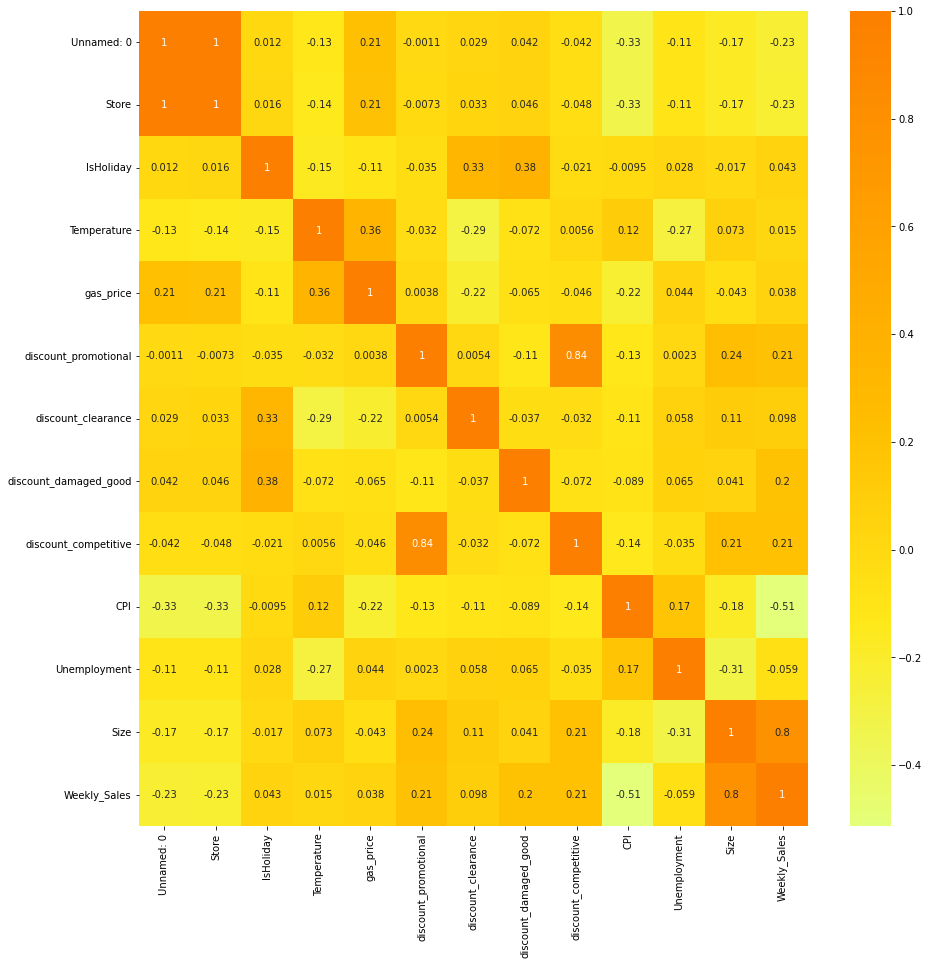

In [112]:
plt.figure(figsize=(15,15))
corr = dfa.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [113]:
dfa = dfa.drop("Unnamed: 0",axis=1)
dfa = dfa.drop("IsHoliday",axis=1)
dfa = dfa.drop("Temperature",axis=1)
dfa = dfa.drop("gas_price",axis=1)
dfa = dfa.drop("Date",axis=1)

In [114]:
dfa["StoreA"]=0
dfa["StoreB"]=0
dfa["StoreC"]=0
dfa.loc[dfa[dfa.Type =='A'].index, "StoreA"]=1
dfa.loc[dfa[dfa.Type =='B'].index, "StoreB"]=1
dfa.loc[dfa[dfa.Type =='C'].index, "StoreC"]=1

In [115]:
dfa=dfa.drop("Type",axis=1)

In [116]:
dfa


,Store,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Size,Weekly_Sales,StoreA,StoreB,StoreC
0,1,9667.50,268.29,0.60,8368.15,223.659114,6.833,151315,1643690.90,1,0,0
1,1,8687.47,1594.87,2.20,2144.87,223.753643,6.833,151315,1641957.44,1,0,0
2,1,2706.87,3128.74,1.88,2396.68,223.917015,6.833,151315,1611968.17,1,0,0
3,1,8368.50,298.46,1.39,1340.29,224.562029,6.833,151315,1439541.59,1,0,0
4,1,2588.06,80.89,3.20,909.76,224.716695,6.833,151315,1472515.79,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
384,10,4407.90,0.00,7.20,3037.56,130.790968,7.170,126512,1827797.40,0,1,0
385,10,11848.88,20.00,47.52,3530.47,130.932548,7.170,126512,1708283.28,0,1,0
386,10,11273.56,245.91,27.00,2976.50,131.010333,7.170,126512,1671857.57,0,1,0
387,10,6091.96,62.82,2.82,3350.88,131.043000,7.170,126512,1694862.41,0,1,0


In [117]:
from sklearn.model_selection import train_test_split
X = dfa.drop('Weekly_Sales',axis=1) # Independet variable
y = dfa['Weekly_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [118]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [119]:
y_pred_sk = lin_reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

In [121]:
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  43975850461.28765
R square obtain for scikit learn library is : 0.9120388635519361


In [195]:
dfb

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-03-12,1439541.59
2010-03-19,1472515.79
2010-03-26,1404429.92
2010-04-02,1594968.28
2010-04-16,1466058.28
2010-04-23,1391256.12


ARIMA


In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

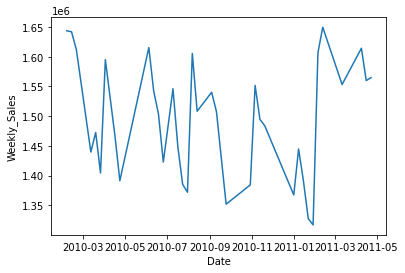

In [214]:
dfb = pd.read_csv('/content/stores_1_to_35.csv', parse_dates = ['Date'], index_col = ['Date'])
dfb.head()
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
dfb.drop(dfb[dfb.Store !=1].index, inplace=True)
dfb=dfb['Weekly_Sales']
dfb=dfb.to_frame()
dfb
dfb.sort_index(inplace=True)
plt.plot(dfb)

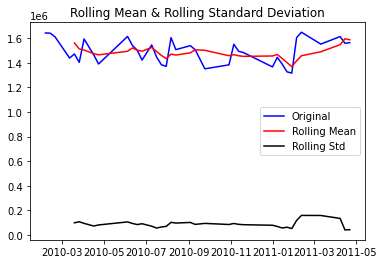

In [215]:
rolling_mean = dfb.rolling(window = 5).mean()
rolling_std = dfb.rolling(window = 5).std()
plt.plot(dfb, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [216]:
result = adfuller(dfb['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.23931262920676
p-value: 0.0005648978539573762
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383


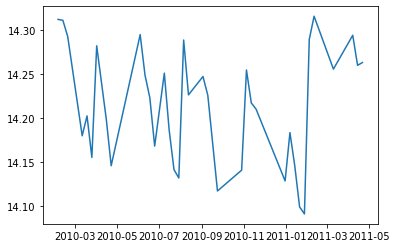

In [251]:
df_log = np.log(dfb)
plt.plot(df_log)

In [218]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Weekly_Sales'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

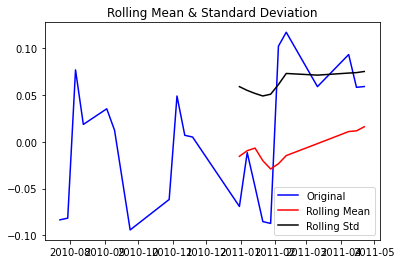

ADF Statistic: -5.043115874125192
p-value: 1.82217805146776e-05
Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443


In [219]:
rolling_mean = df_log.rolling(window=16).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

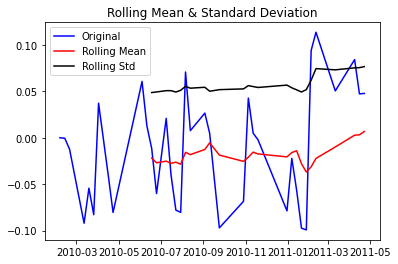

ADF Statistic: -4.0921712823055545
p-value: 0.0009977886970018045
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383


In [220]:
rolling_mean_exp_decay = df_log.ewm(halflife=16, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

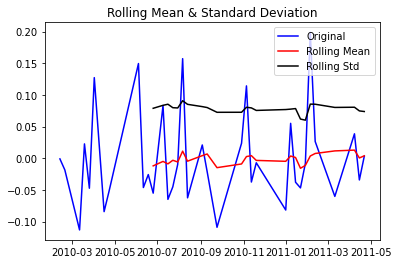

ADF Statistic: -5.303296074937923
p-value: 5.390224047672758e-06
Critical Values:
	1%: -3.6461350877925254
	5%: -2.954126991123355
	10%: -2.6159676124885216


In [252]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

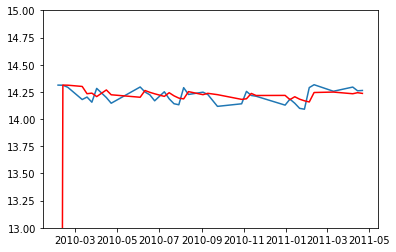

In [256]:
decomposition = seasonal_decompose(dfb, period=1) 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.ylim(13,15)
plt.plot(df_log)
plt.plot(results.fittedvalues, color='red')

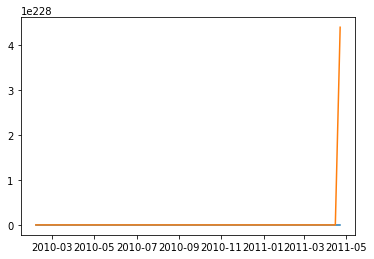

In [260]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Weekly_Sales'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

AttributeError: ignored

In [223]:
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

LinAlgError: ignored

In [169]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

NameError: ignored

In [187]:
df=dfb

msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

TypeError: ignored

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

<ipython-input-181-133a9172aa58>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df.Weekly_Sales, freq=12)


<Figure size 432x288 with 0 Axes>

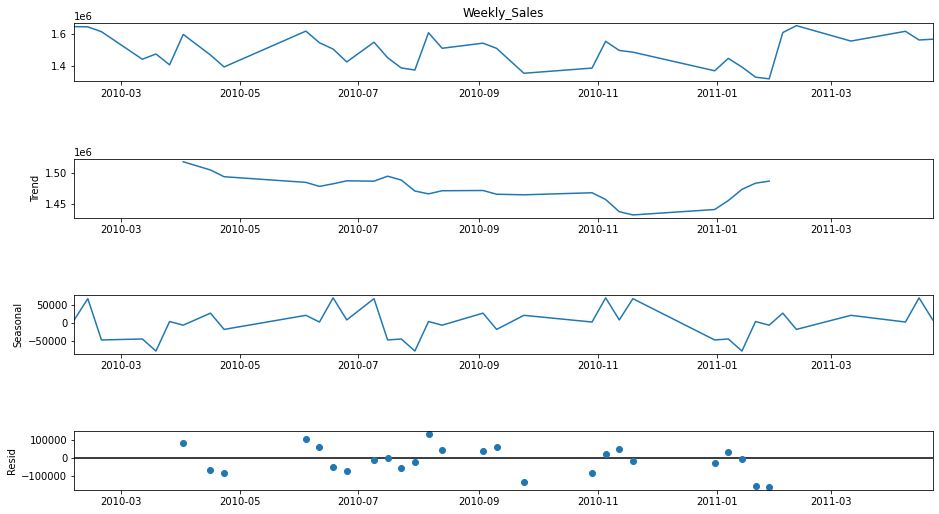

In [181]:
decomposition = seasonal_decompose(df.Weekly_Sales, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [184]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput )

In [190]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.Weekly_Sales, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                         Weekly_Sales   No. Observations:                   37
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -321.031
Date:                              Fri, 02 Dec 2022   AIC                            648.062
Time:                                      02:05:23   BIC                            651.596
Sample:                                           0   HQIC                           648.999
                                               - 37                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4963      0.405      1.225      0.221      -0.298       1.290
ma.S.L12      -0.84

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


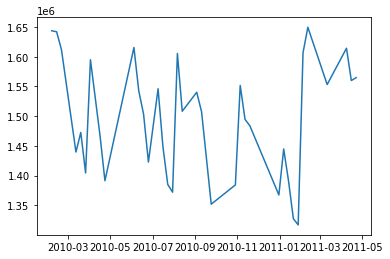

In [192]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Weekly_Sales'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

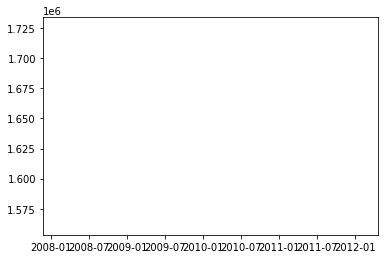

In [194]:
plt.plot(predictions_ARIMA)

AttributeError: ignored

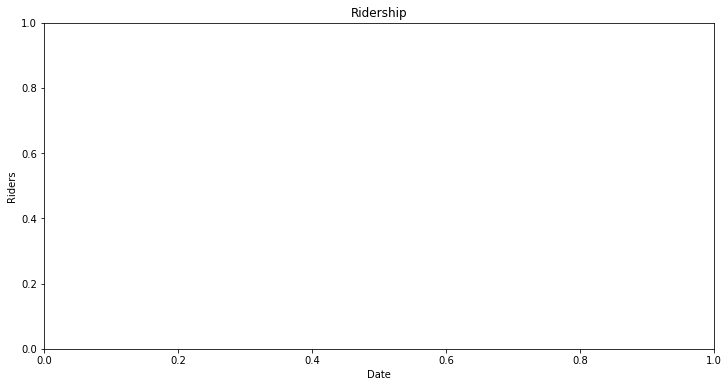

In [191]:
npredict =df.Weekly_Sales['2011'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Ridership', xlabel='Date', ylabel='Riders')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'riders'], 'o', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')

In [ ]:
df.loc[df["Type"]=="A","Type"]=0
df.loc[df["Type"]=="B","Type"]=1
df

,Unnamed: 0,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Weekly_Sales
0,0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,0,151315,1643690.90
1,1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,0,151315,1641957.44
2,2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,0,151315,1611968.17
3,5,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,0,151315,1439541.59
4,6,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,0,151315,1472515.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6312,35,6/22/2012,False,73.23,3.564,5984.00,32.80,0.57,528.54,142.160646,8.876,1,103681,911696.00
1257,6314,35,7/6/2012,False,82.08,3.475,7808.90,7.00,47.50,6948.28,142.223430,8.839,1,103681,985479.64
1258,6325,35,9/21/2012,False,66.10,4.038,6982.10,87.37,6.00,2085.94,142.679817,8.839,1,103681,772302.94
1259,6326,35,9/28/2012,False,64.92,3.997,20867.96,42.64,3.22,5895.05,142.765750,8.839,1,103681,814099.86


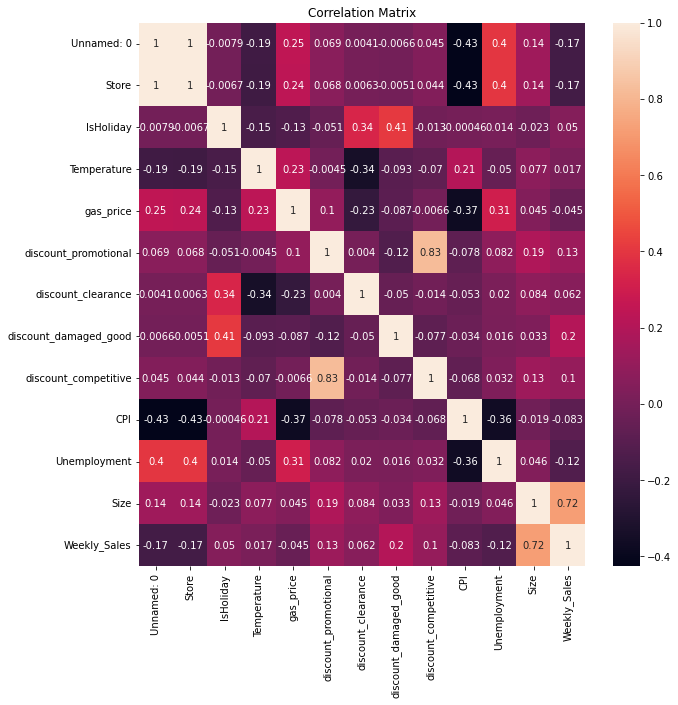

In [ ]:

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
target = df["Type"]
# getting train data from the dataframe
train = df.drop("Type",axis=1)
train = train.drop("Date",axis=1)
train = train.drop("Store",axis=1)

train = train.drop("Unnamed: 0",axis=1)

# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.25)
train.head()

,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Size,Weekly_Sales
0,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,151315,1643690.90
1,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,151315,1641957.44
2,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,151315,1611968.17
3,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,151315,1439541.59
4,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,151315,1472515.79


In [ ]:
from sklearn.metrics import classification_report
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)



[17:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

pred_finalNoAVG=(pred_1+pred_2+pred_3)/3

for i in range(len(pred_1)):
        if pred_1[i] <0.5:  
          pred_1[i]=0
        else:  
          pred_1[i]=1
for i in range(len(pred_2)):
        if pred_2[i] <0.5:  
          pred_2[i]=0
        else:  
          pred_2[i]=1
for i in range(len(pred_3)):
        if pred_3[i] <0.5:  
          pred_3[i]=0
        else:  
          pred_3[i]=1

pred_finalAVG=(pred_1+pred_2+pred_3)/3

for i in range(len(pred_finalAVG)):
        if pred_finalAVG[i] <0.5:  
          pred_finalAVG[i]=0
        else:  
          pred_finalAVG[i]=1
for i in range(len(pred_finalNoAVG)):
        if pred_finalNoAVG[i] <0.5:  
          pred_finalNoAVG[i]=0
        else:  
          pred_finalNoAVG[i]=1

[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]


In [ ]:

y_test=y_test.tolist()
y_test=np.asarray(y_test)


ENSEMBLE

In [ ]:
print("Linear Regression Score for store type prediction\n\n",classification_report(y_test, pred_1))
print("XGBRegressor Score for store type prediction\n\n",classification_report(y_test, pred_2))
print("RandomForestRegressor Score for store type prediction\n\n",classification_report(y_test, pred_3))
print("Ensemble Method Score for store type prediction\n\n",classification_report(y_test, pred_finalNoAVG))
print("Ensemble Method AVG Score for store type prediction\n\n",classification_report(y_test, pred_finalAVG))

Linear Regression Score for store type prediction

               precision    recall  f1-score   support

           0       0.93      0.98      0.95       168
           1       0.98      0.91      0.94       147

    accuracy                           0.95       315
   macro avg       0.95      0.95      0.95       315
weighted avg       0.95      0.95      0.95       315

XGBRegressor Score for store type prediction

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       168
           1       0.99      1.00      1.00       147

    accuracy                           1.00       315
   macro avg       1.00      1.00      1.00       315
weighted avg       1.00      1.00      1.00       315

RandomForestRegressor Score for store type prediction

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       168
           1       0.99      1.00      1.00       147

    accuracy               

In [ ]:
train.columns

Index(['IsHoliday', 'Temperature', 'gas_price', 'discount_promotional',
       'discount_clearance', 'discount_damaged_good', 'discount_competitive',
       'CPI', 'Unemployment', 'Size', 'Weekly_Sales'],
      dtype='object')

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
train = scaler.fit_transform(train.to_numpy())
train = pd.DataFrame(df_scaled, columns=[ 'IsHoliday', 'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive', 'CPI', 'Unemployment', 'Size', 'Weekly_Sales'])

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

# Splitting between train data
x_train, x_test, y_train, y_test = train_test_split(
    train, target, test_size=0.25)


In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_9 (LSTM)               (None, 128)               98816     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 5, 128)           38400     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [ ]:
type(x_train)
x_train.to_numpy()
type(y_train)
y_train.to_numpy()


In [ ]:
class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super(NestedCell, self).__init__(**kwargs)

    def build(self, input_shapes):
        # expect input_shape to contain 2 items, [(batch, i1), (batch, i2, i3)]
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(
            shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
        )
        self.kernel_2_3 = self.add_weight(
            shape=(i2, i3, self.unit_2, self.unit_3),
            initializer="uniform",
            name="kernel_2_3",
        )

    def call(self, inputs, states):
        # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
        # state should be in shape [(batch, unit_1), (batch, unit_2, unit_3)]
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {"unit_1": self.unit_1, "unit_2": unit_2, "unit_3": self.unit_3}


In [ ]:
unit_1 = 10
unit_2 = 20
unit_3 = 30

i1 = 32
i2 = 64
i3 = 32
batch_size = 64
num_batches = 10
timestep = 50

cell = NestedCell(unit_1, unit_2, unit_3)
rnn = keras.layers.RNN(cell)

input_1 = keras.Input((None, i1))
input_2 = keras.Input((None, i2, i3))

outputs = rnn((input_1, input_2))
model = keras.models.Model([input_1, input_2], outputs)

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train)

ValueError: ignored

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

In [ ]:
x_train.reshape(-1, 1)

array([[0.        ],
       [0.57083098],
       [0.38031496],
       ...,
       [0.60615001],
       [0.31807282],
       [0.11547631]])

In [ ]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

AttributeError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: ignored